# protoDC2: mass relations

> Notebook owner: Yao-Yuan Mao [@yymao](https://github.com/LSSTDESC/DC2_Repo/issues/new?body=@yymao). Last run: 7/17

In this notebook we demostrate how to plot the halo mass-stellar mass relation and also the BH mass-bulge mass relation for the protoDC2 galaxy catalog.

## Learning objectives
- Use `GCRCatalogs` to access the protoDC2 catalog. 
- Be able to explore useful quantities using `GCRCatalogs`.
- Be able to use filters when accessing quantities.

In [1]:
import GCRCatalogs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
gc = GCRCatalogs.load_catalog('protoDC2_test')

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:105: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


In [4]:
# let's see what masses are availble 
sorted(c for c in gc.list_all_quantities(True) if 'mass' in c.lower())

['UMachineNative/target_halo_mass',
 'blackHoleMass',
 'diskMassStellar',
 'halo_mass',
 'hostHaloMass',
 'hostHaloSODMass',
 'infallHaloMass',
 'spheroidMassStellar',
 'stellar_mass',
 'stellar_mass_bulge',
 'stellar_mass_disk',
 'totalMassStellar']

## stellar mass - halo mass relation for low-z central galaxies

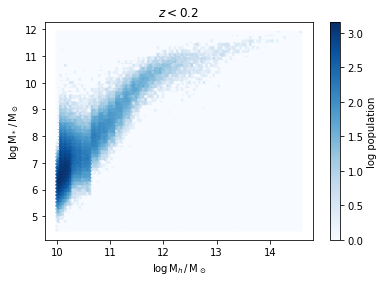

In [5]:
data = gc.get_quantities(['stellar_mass', 'halo_mass'], filters=['redshift < 0.2', 'is_central'])
cs = plt.hexbin(np.log10(data['halo_mass']), np.log10(data['stellar_mass']), cmap='Blues', bins='log');
plt.colorbar(cs, label='log population');
plt.xlabel(r'$\log \, {\rm M}_h \, / \, {\rm M}_\odot$');
plt.ylabel(r'$\log \, {\rm M}_* \, / \, {\rm M}_\odot$');
plt.title(r'$z < 0.2$');

let's see if the relation changes with redshift

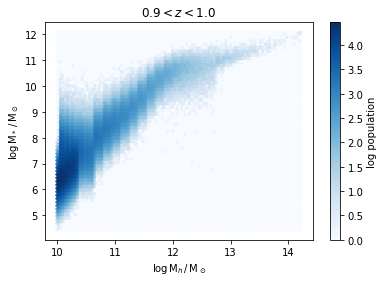

In [6]:
data = gc.get_quantities(['stellar_mass', 'halo_mass'], filters=['redshift > 0.9', 'redshift < 1', 'is_central'])
cs = plt.hexbin(np.log10(data['halo_mass']), np.log10(data['stellar_mass']), cmap='Blues', bins='log');
plt.colorbar(cs, label='log population');
plt.xlabel(r'$\log \, {\rm M}_h \, / \, {\rm M}_\odot$');
plt.ylabel(r'$\log \, {\rm M}_* \, / \, {\rm M}_\odot$');
plt.title(r'$0.9 < z < 1.0$');

## bulge mass - black hole mass relation for low-z central galaxies

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


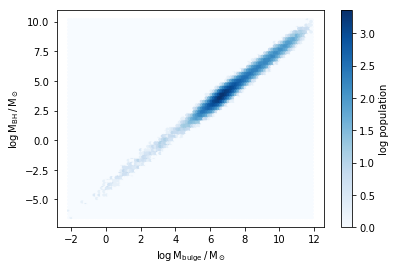

In [7]:
data = gc.get_quantities(['stellar_mass_bulge', 'blackHoleMass'], filters=['redshift < 0.2', 'is_central'])
cs = plt.hexbin(np.log10(data['stellar_mass_bulge']), np.log10(data['blackHoleMass']), cmap='Blues', bins='log');
plt.colorbar(cs, label='log population');
plt.xlabel(r'$\log \, {\rm M}_{\rm bulge} \, / \, {\rm M}_\odot$');
plt.ylabel(r'$\log \, {\rm M}_{\rm BH} \, / \, {\rm M}_\odot$');